<a href="https://colab.research.google.com/github/christitensor/Fin6470/blob/master/Exam_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from scipy import stats

In [0]:
rawData = pd.read_csv("https://raw.githubusercontent.com/broughtj/Fin5330/master/Exams/Exam1/WaterStocksAdj.csv", index_col = 0, parse_dates=True)
rawData.columns = ('CTWS', 'WTR','AWR')

In [0]:
awrAdfResult = sm.tsa.stattools.adfuller(rawData.AWR.apply(np.abs).apply(np.log), maxlag = 1, regression = 'nc')

In [0]:
ctwsAdfResult = sm.tsa.stattools.adfuller(rawData.CTWS.apply(np.abs).apply(np.log),maxlag = 1, regression= 'nc')
wtrAdfResult = sm.tsa.stattools.adfuller(rawData.WTR.apply(np.abs).apply(np.log), maxlag = 1, regression = 'nc')

In [128]:
print ("Is a unit root present for AWR?")
if awrAdfResult[0] > awrAdfResult[4]['10%']:
  print("A unit root is not present")
else:
  print("A unit root is present")

print()
print("Is a unit root present for CTWS?")
if ctwsAdfResult[0] > ctwsAdfResult[4]['10%']:
  print('A unit root is not present')
else :
  print("A unit root is present")

print()
print('Is a unit root present for WTR?')
if wtrAdfResult[0] > wtrAdfResult[4]['10%']:
  print ('A unit root is not present')
else:
  print("A unit root is present")

Is a unit root present for AWR?
A unit root is not present

Is a unit root present for CTWS?
A unit root is not present

Is a unit root present for WTR?
A unit root is not present


In [0]:
#cointegration

awrprice = pd.Series(np.log(abs(rawData.AWR)))
ctwsprice = pd.Series(np.log(abs(rawData.CTWS)))
wtrprice = pd.Series(np.log(abs(rawData.WTR)))
cointdf = pd.DataFrame(dict (AWR = awrprice, CTWS = ctwsprice, WTR = wtrprice))
#cointdf = pd.DataFrame(dict( awr, ctws = pd.Series(ctws.date), wtr = pd.Series(wtr.date) )) 
#cointdf.head()

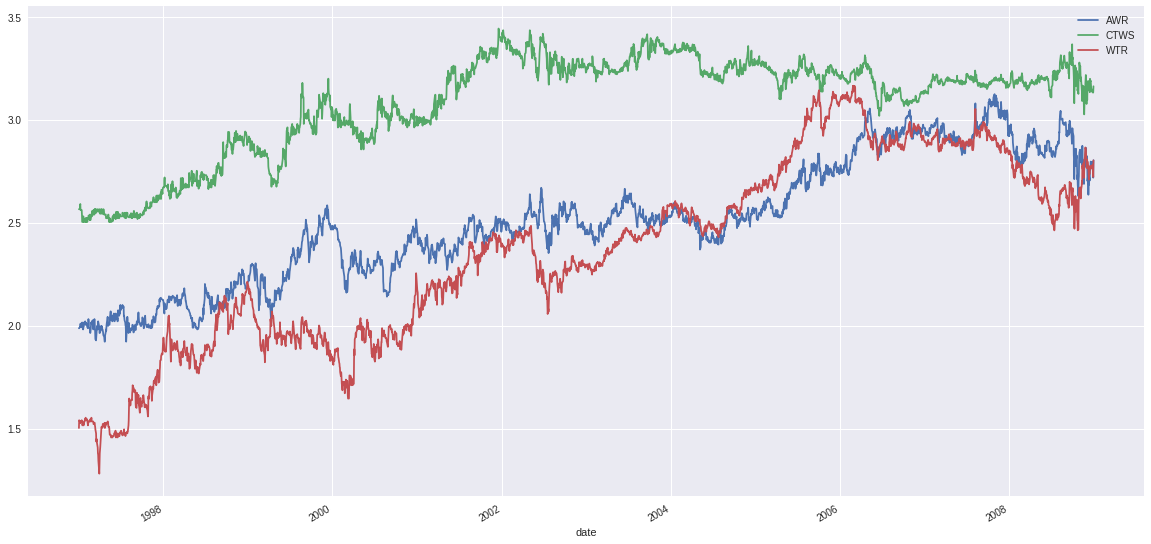

In [130]:
cointdf.plot(grid = True)

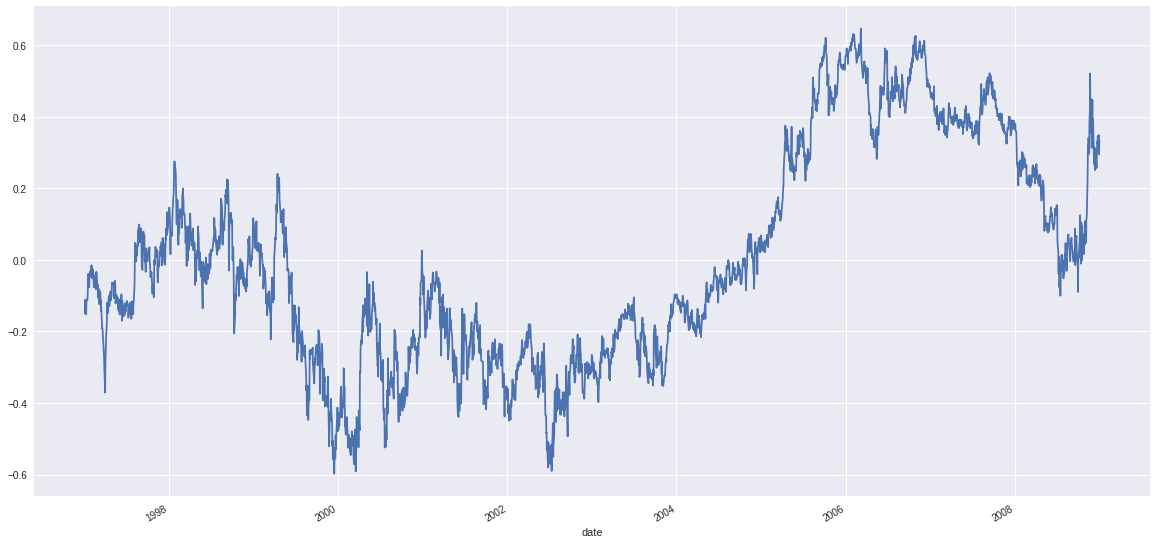

In [131]:
reg = stats.linregress(ctwsprice, wtrprice)
uhat = wtrprice - reg.intercept-reg.slope*ctwsprice
resids = pd.Series(uhat)
resids.plot(grid=True)

In [132]:
results = sm.tsa.adfuller(uhat)
print(f"The ADF test statistic is: {results[0]: 0.4f}, with a p-value of: {results[1] : 0.4f}")

The ADF test statistic is: -2.0271, with a p-value of:  0.2748


In [0]:
#rawData = rawData.set_index(rawData['date'])
first3=rawData.loc['1997-01-01':'1999-12-31']

#last9wtr = wtrData.loc[wtrData['date']>= 20000101 ]
#first3ctws = ctwsData.loc['1997-01-01':'1999-12-31']
#last9ctws = ctwsData.loc[ctwsData['date']<=20000101]

In [0]:

logfirst3wtr = np.log(abs(first3.WTR))
logfirst3ctws = np.log(abs(first3.CTWS))
#logfirst3wtr.count()
from scipy import stats
Reg = stats.linregress(logfirst3ctws,logfirst3wtr)

In [0]:
Reg
N = logfirst3ctws.count()
sigmai = Reg[4] * (N**.5)

In [136]:
b = Reg[0]
a = Reg[1]
logwtrhat = a + b *(logfirst3ctws)
Diff = np.subtract(logfirst3wtr,logwtrhat)
sigmae = np.std(Diff)
sigmae

0.13488957095908574

In [0]:

WTR_shares = 1000* (rawData.CTWS / rawData.WTR)
CTWS_shares = 1000 * (rawData.WTR / rawData.CTWS)

In [0]:
delta1 = .25
delta2 = .50
delta3 = .75
N = Diff.count()
upper = np.empty(757)
upper.fill(1.0*delta1* sigmae)
lower = np.empty(N)
lower.fill (-1.0 * delta2 * sigmae)
#plt.plot(Diff)
#isinstance(int(N), int)
#N

In [0]:
upper1=(1.0*delta1* sigmae)
lower1= (-1.0 * delta1 * sigmae)

'"upper=(1.0*delta2* sigmae)\nlower= (-1.0 * delta2 * sigmae)\n#plt.subplot(1,3,2)\nplt.plot(Diff, \'lime\')\nplt.axhline(upper, color = \'red\', linestyle = \'dashed\')\nplt.axhline(lower, color = \'r\', linestyle =\'dashed\')\nplt.title("Delta = 0.5")\n\n\nupper=(1.0*delta3* sigmae)\nlower= (-1.0 * delta3 * sigmae)\n#plt.subplot(1,3,3)\nplt.plot(Diff, \'lime\')\nplt.axhline(upper, color = \'red\', linestyle = \'dashed\')\nplt.axhline(lower, color = \'r\', linestyle =\'dashed\')\nplt.title("Delta = 0.75")'

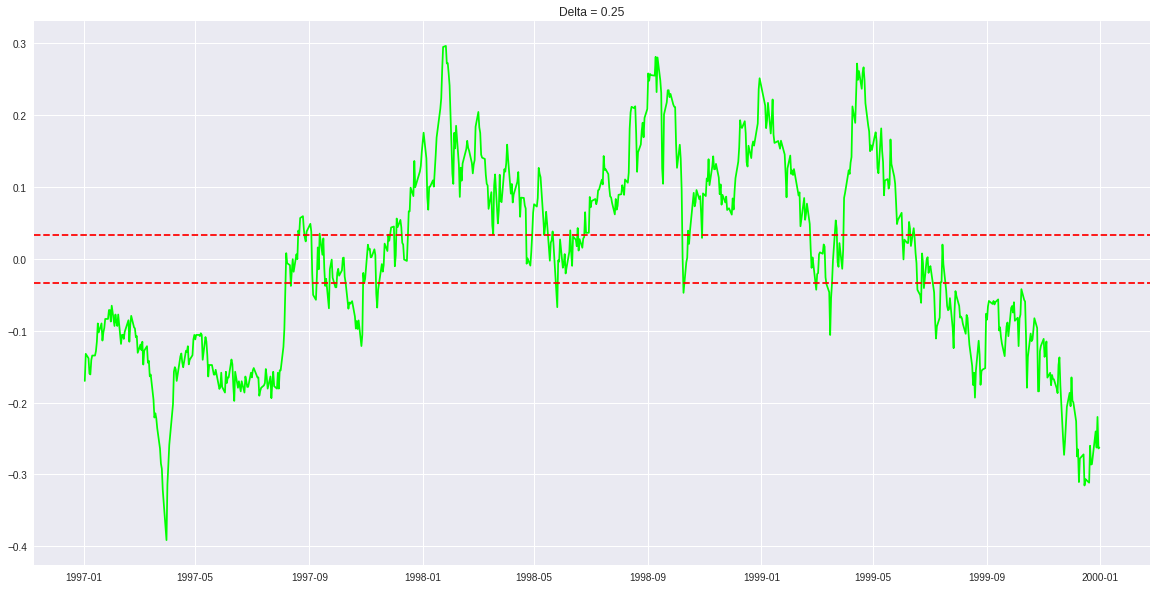

In [140]:
#plt.subplot(1,3,1)
plt.plot(Diff, 'lime')
plt.axhline(upper1, color = 'red', linestyle = 'dashed')
plt.axhline(lower1, color = 'r', linestyle ='dashed')
plt.title('Delta = 0.25')


""""upper=(1.0*delta2* sigmae)
lower= (-1.0 * delta2 * sigmae)
#plt.subplot(1,3,2)
plt.plot(Diff, 'lime')
plt.axhline(upper, color = 'red', linestyle = 'dashed')
plt.axhline(lower, color = 'r', linestyle ='dashed')
plt.title("Delta = 0.5")


upper=(1.0*delta3* sigmae)
lower= (-1.0 * delta3 * sigmae)
#plt.subplot(1,3,3)
plt.plot(Diff, 'lime')
plt.axhline(upper, color = 'red', linestyle = 'dashed')
plt.axhline(lower, color = 'r', linestyle ='dashed')
plt.title("Delta = 0.75")"""

Text(0.5, 1.0, 'Delta = 0.5')

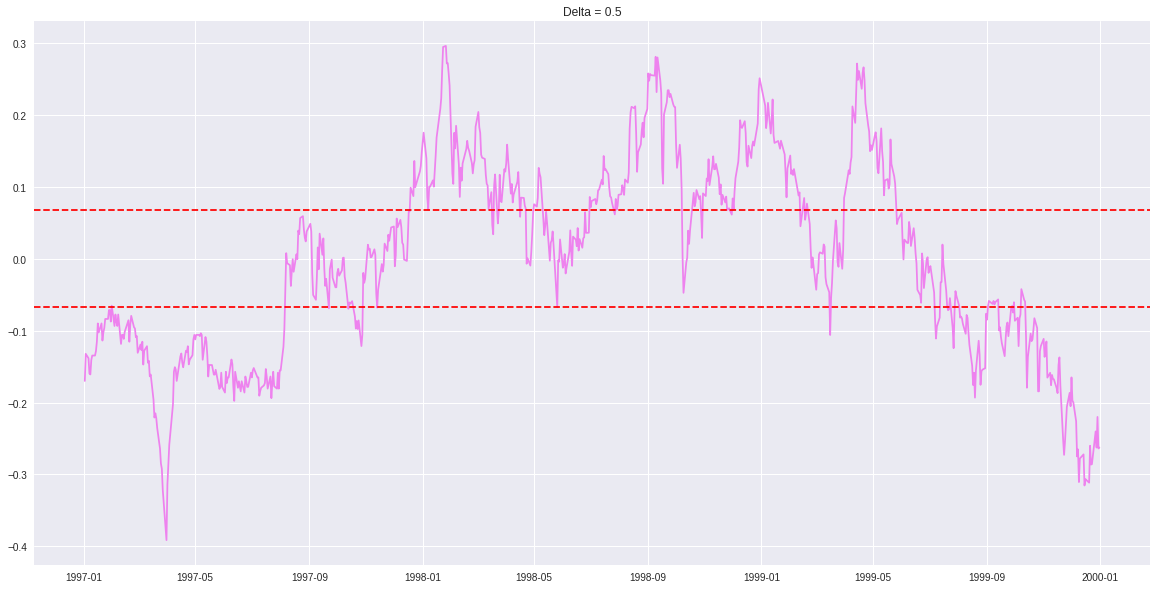

In [141]:
upper2=(1.0*delta2* sigmae)
lower2= (-1.0 * delta2 * sigmae)
plt.plot(Diff, 'violet')
plt.axhline(upper2, color = 'red', linestyle = 'dashed')
plt.axhline(lower2, color = 'r', linestyle ='dashed')
plt.title("Delta = 0.5")

Text(0.5, 1.0, 'Delta = 0.75')

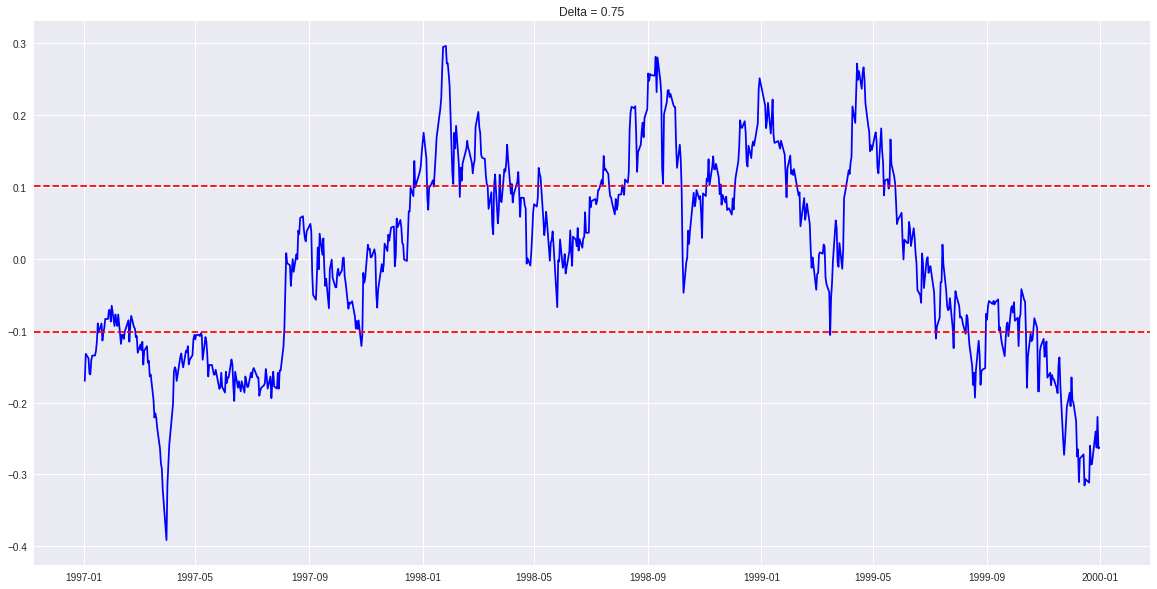

In [142]:
upper3=(1.0*delta3* sigmae)
lower3= (-1.0 * delta3 * sigmae)
#plt.subplot(1,3,3)
plt.plot(Diff, 'blue')
plt.axhline(upper3, color = 'red', linestyle = 'dashed')
plt.axhline(lower3, color = 'r', linestyle ='dashed')
plt.title("Delta = 0.75")

In [0]:
df = pd.DataFrame(data = Diff)
df.columns = ['Diff']

In [0]:
def buySell(upper, lower):
  df["Strategy"] = np.where(df.Diff> upper,1,0)
  df["Strategy"] = np.where(df.Diff< lower, -1, df["Strategy"])
  df["Signal"] = np.sign(df["Strategy"]-df["Strategy"].shift(1))

In [145]:
buySell(upper1, lower1)
delta1bs =pd.DataFrame( data = df['Signal'].value_counts())
df.loc[df['Signal'] == -1.0]

,Diff,Strategy,Signal
date,,,
1997-08-12,-0.037661,-1,-1.0
1997-08-27,0.029599,0,-1.0
1997-09-04,-0.020177,0,-1.0
1997-09-05,-0.050202,-1,-1.0
1997-09-15,0.005681,0,-1.0
1997-09-18,-0.037661,-1,-1.0
1997-09-22,-0.068852,-1,-1.0
1997-09-29,-0.039524,-1,-1.0
1997-10-13,-0.069368,-1,-1.0


In [0]:
buySell(upper2,lower2)
delta2bs =pd.DataFrame( data = df['Signal'].value_counts())

In [0]:
buySell(upper3,lower3)
delta3bs =pd.DataFrame( data = df['Signal'].value_counts())

In [0]:
awrreturn = (awrprice.loc['1997-08-27'] - awrprice.loc['1997-08-12']) / awrprice.loc['1997-08-12']

In [0]:
ctwsreturn = (ctwsprice.loc['1997-08-27'] - ctwsprice.loc['1997-08-12']) / ctwsprice.loc['1997-08-12']

In [0]:
totalreturn = (awrreturn + ctwsreturn)*100

In [152]:
problem1table = ({'Delta' :(delta1, delta2, delta3) ,
  'Buy': (delta1bs.Signal[1.0] , delta2bs.Signal[1.0], delta3bs.Signal[1.0]),
  'Sell' : (delta1bs.Signal[-1.0] , delta2bs.Signal[-1.0], delta3bs.Signal[-1.0] )})

df=pd.DataFrame.from_dict(problem1table, orient='Columns')
df=df[['Delta','Buy','Sell']]
df

,Delta,Buy,Sell
0,0.25,34,34
1,0.50,27,27
2,0.75,37,37


The first signal in on 8/12/19997. This is signaled as a sell. This is signalling that we should short CTWS and long WTR.

---



We hold this for a short time, only 15 days. The total return for this period is

In [153]:
print("We hold this for a short time, only 15 days. The total return for this period is ", totalreturn,'%')

We hold this for a short time, only 15 days. The total return for this period is  1.5591697326939156 %
